## Toxic Releases By Mitchell Caplan

In [3]:
import geopandas as gpd
import pandas as pd
import fpsnippets
import matplotlib.pyplot as plt

pitt = gpd.read_file('Neighbor/Neighborhoods_.shp')

pitt.head(3)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."


Lets also load in the dataset that will be needed for them to be processed into graphs and also filter out the ones do not have clean air

In [4]:
toxic = pd.read_csv('TRIair.csv')
toxic_no = toxic[toxic['CLEAN_AIR'] == 'N']

toxic_no.head(10)

,_id,TRI_FACILITY_ID,DOC_CTRL_NUM,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,COUNTY_NAME,STATE_COUNTY_FIPS_CODE,STATE_ABBR,ZIP_CODE,...,NAICS_CODES,INDUSTRY_CODE,SRS_ID,PFAS_IND,ENVIRONMENTAL_MEDIUM,RELEASE_RANGE_CODE,TOTAL_RELEASE,REL_EST_AMT,RELEASE_NA,RELEASE_BASIS_EST_CODE
7,522794,15225SHLND2650N,1397110000799,INEOS COMPOSITES US LLC,2650 NEVILLE RD,PITTSBURGH,ALLEGHENY,42003,PA,15225,...,325211.0,325,6643.0,N,AIR FUG,NaN,160.0,160.0,0,O
8,522795,15225SHLND2650N,1397110000799,INEOS COMPOSITES US LLC,2650 NEVILLE RD,PITTSBURGH,ALLEGHENY,42003,PA,15225,...,325211.0,325,6643.0,N,AIR STACK,NaN,310.0,310.0,0,O
21,522808,15201PRSSR3419S,1397110001169,PRESSURE CHEMICAL CO,3419 SMALLMAN ST,PITTSBURGH,ALLEGHENY,42003,PA,15201,...,325199.0,325,27003.0,N,AIR FUG,NaN,0.0,0.0,1,NaN
22,522809,15201PRSSR3419S,1397110001169,PRESSURE CHEMICAL CO,3419 SMALLMAN ST,PITTSBURGH,ALLEGHENY,42003,PA,15201,...,325199.0,325,27003.0,N,AIR STACK,NaN,7524.0,7524.0,0,C
41,522828,15051MRCNRSTATE,1397110023227,KINDER MORGAN TRANSMIX CO LLC,918 RT 910,INDIANOLA,ALLEGHENY,42003,PA,15051,...,324110.0,324,16261.0,N,AIR FUG,NaN,165.0,165.0,0,O
42,522829,15051MRCNRSTATE,1397110023227,KINDER MORGAN TRANSMIX CO LLC,918 RT 910,INDIANOLA,ALLEGHENY,42003,PA,15051,...,324110.0,324,16261.0,N,AIR STACK,NaN,45.0,45.0,0,O
45,522832,15226MTTHW1315W,1397110036946,MATTHEWS INTERNATIONAL CORP,1315 W LIBERTY AVE,PITTSBURGH,ALLEGHENY,42003,PA,15226,...,331525.0,331,152363.0,N,AIR FUG,3.0,250.0,250.0,0,E
46,522833,15226MTTHW1315W,1397110036946,MATTHEWS INTERNATIONAL CORP,1315 W LIBERTY AVE,PITTSBURGH,ALLEGHENY,42003,PA,15226,...,331525.0,331,152363.0,N,AIR STACK,3.0,250.0,250.0,0,E
47,522834,15202PTTSB1HERR,1397110038914,PITTSBURGH INDL PLATING,1 HERRON AVE,PITTSBURGH,ALLEGHENY,42003,PA,15202,...,332813.0,332,152686.0,N,AIR FUG,1.0,5.0,5.0,0,O
48,522835,15202PTTSB1HERR,1397110038914,PITTSBURGH INDL PLATING,1 HERRON AVE,PITTSBURGH,ALLEGHENY,42003,PA,15202,...,332813.0,332,152686.0,N,AIR STACK,NaN,0.0,0.0,0,O


To enhance the dataframe with release information, we'll incorporate the relevant release data into the corresponding values within the dataframe. This could involve appending new columns dedicated to release information such as release data. By doing so, This enhancement ensures that the dataframe not only contains the raw data but also offers valuable insights into the evolution of the entries it represents, thereby enhancing its usability and analytical capabilities.

In [17]:
add_val = {"Neighborhood" : [],
          "Release" : []}
rows = 0
for i, tox in toxic_no.iterrows():
    
    possible = fpsnippets.zip_to_neighborhoods(tox['ZIP_CODE'])
    amount = tox["TOTAL_RELEASE"]
    
    if possible:
        for thing in possible:
            add_val["Neighborhood"].append(thing)
            add_val['Release'].append(amount)
            rows += 1
            
neighborhoods = pd.DataFrame(add_val,index = list(range(rows)))
neighborhoods.to_csv("Data/revised_data.csv", index=False)

Basic setup and summing the data together

In [5]:
data = pd.read_csv('revised_data.csv')
summed_values = data.groupby('Neighborhood')['Release'].sum().reset_index()

revised_neighborhoods = pd.DataFrame(summed_values)


revised_neighborhoods.head(10)

,Neighborhood,Release
0,Allegheny Center,303411.00
1,Allegheny West,303411.00
2,Allentown,1800.00
3,Arlington,1800.00
4,Arlington Heights,1800.00
5,Banksville,77000.00
6,Bedford Dwellings,820.00
7,Beechview,277611.00
8,Beltzhoover,200611.00
9,Bloomfield,1066991.14


Get the biggest toxic releases in the top 10 neighbors 

In [6]:
neighborhoods_sorted = revised_neighborhoods.sort_values("Release", ascending=False)

neighborhoods_sorted.head(10)

,Neighborhood,Release
36,Hays,2543151.61
43,Lincoln Place,2542784.61
51,New Homestead,1438432.00
73,Squirrel Hill South,1405037.22
66,South Oakland,1400012.00
37,Hazelwood,1399192.00
35,Greenfield,1399192.00
34,Glen Hazel,1399192.00
27,East Liberty,1066991.14
33,Garfield,1066991.14


We see that Hayes is the neighborhood with the most Toxic Releases. Let's plot the top 10 neighborhoods.(Measured by Million)

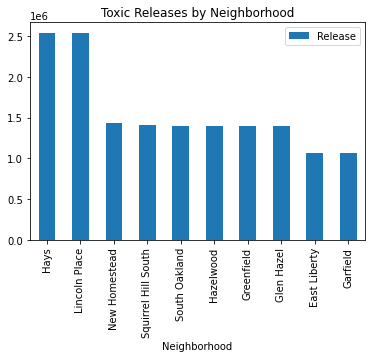

In [7]:
plt = neighborhoods_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Release", title="Toxic Releases by Neighborhood")

Let's plot the safest neighborhoods in Pittsburgh to provide an easy-to-understand visual representation. (measured in millions)

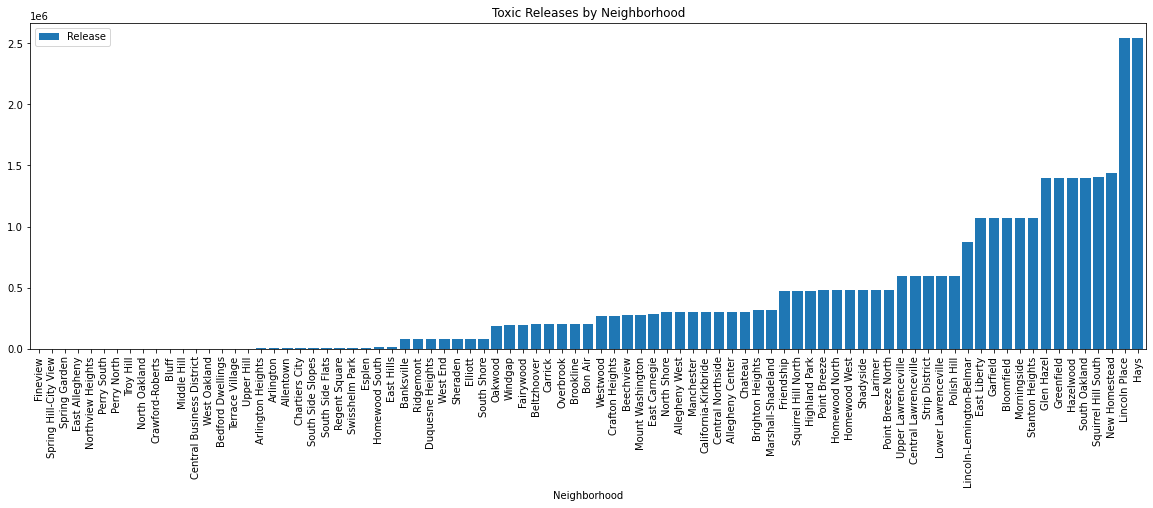

In [12]:
neighborhoods_asc = neighborhoods_sorted.sort_values("Release")
plt2 = neighborhoods_asc.plot(kind='bar', x="Neighborhood", y="Release", title="Toxic Releases by Neighborhood", width=.8, figsize=(20, 6), rot=90)

Lets add the data to the map of pittsburgh

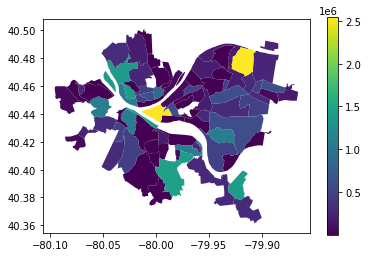

In [22]:
pitt["TOTAL_RELEASE"] = revised_neighborhoods["Release"]

pitt.plot(column="TOTAL_RELEASE", legend=True)

That the conclusion of a map of pittsburgh that has the most Toxic Releases